In [2]:
%reload_ext autoreload
%autoreload 2

import os
os.chdir(f"/home/{os.getlogin()}/watttime-python-client-aer-algo")

import optimizer.s3 as s3u
import evaluation.eval_framework as efu

In [13]:
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

# Import results

In [3]:
s3 = s3u.s3_utils()
results_key = "results/20240726_1k_synth_users_163_days_CAISO_NORTH.csv"
results_data = s3.load_csvdataframe(file=results_key)

In [6]:
user_key = '20240726_1k_synth_users_163_days.csv'
user_data = s3.load_csvdataframe(file = user_key)

In [11]:
results_data = user_data[['user_type','power_output_rate']].merge(results_data, left_index=True, right_index=True)

## Metrics
- would be interesting to know the forecast error over this period

In [26]:
results_data.head()

,user_type,power_output_rate,distinct_dates,plug_in_time,total_intervals_plugged_in,charged_kWh_actual,MWh_fraction,simple_actual_emissions,baseline_actual_emissions,difference,percent_difference_baseline
0,r4.181_tc76_avglc28022_sdlc7793,4.181,2023-01-02,2023-01-02 20:06:14,78.682387,27.414255,0.000348,27.091486,27.091486,0.000000,0.000000
1,r4.181_tc76_avglc28022_sdlc7793,4.181,2023-01-06,2023-01-06 20:59:14,79.149186,27.521895,0.000348,26.734708,26.743418,-0.008710,-0.000326
2,r4.181_tc76_avglc28022_sdlc7793,4.181,2023-01-11,2023-01-11 19:07:44,75.714863,26.380320,0.000348,25.868892,25.868892,0.000000,0.000000
3,r4.181_tc76_avglc28022_sdlc7793,4.181,2023-01-15,2023-01-15 20:26:27,125.351706,43.674624,0.000348,41.960168,41.960168,0.000000,0.000000
4,r4.181_tc76_avglc28022_sdlc7793,4.181,2023-01-18,2023-01-18 20:12:20,119.116206,37.903300,0.000348,37.185814,37.201841,-0.016027,-0.000431


In [20]:
# you want a negative value
results_data["difference"] = results_data["simple_actual_emissions"] - results_data["baseline_actual_emissions"]

In [25]:
# percent difference
results_data["percent_difference_baseline"] = np.divide(results_data["difference"], results_data["baseline_actual_emissions"])

In [27]:
results_data.corr(numeric_only=True)

,power_output_rate,total_intervals_plugged_in,charged_kWh_actual,MWh_fraction,simple_actual_emissions,baseline_actual_emissions,difference,percent_difference_baseline
power_output_rate,1.000000,-0.007185,0.256942,1.000000,0.253265,0.267504,-0.269251,-0.159711
total_intervals_plugged_in,-0.007185,1.000000,0.259438,-0.007185,0.242936,0.255729,-0.243453,-0.187819
charged_kWh_actual,0.256942,0.259438,1.000000,0.256942,0.992600,0.993314,-0.111755,0.078521
MWh_fraction,1.000000,-0.007185,0.256942,1.000000,0.253265,0.267504,-0.269251,-0.159711
simple_actual_emissions,0.253265,0.242936,0.992600,0.253265,1.000000,0.998302,-0.071189,0.102854
baseline_actual_emissions,0.267504,0.255729,0.993314,0.267504,0.998302,1.000000,-0.129162,0.058736
difference,-0.269251,-0.243453,-0.111755,-0.269251,-0.071189,-0.129162,1.000000,0.745255
percent_difference_baseline,-0.159711,-0.187819,0.078521,-0.159711,0.102854,0.058736,0.745255,1.000000


<Axes: xlabel='simple_actual_emissions', ylabel='baseline_actual_emissions'>

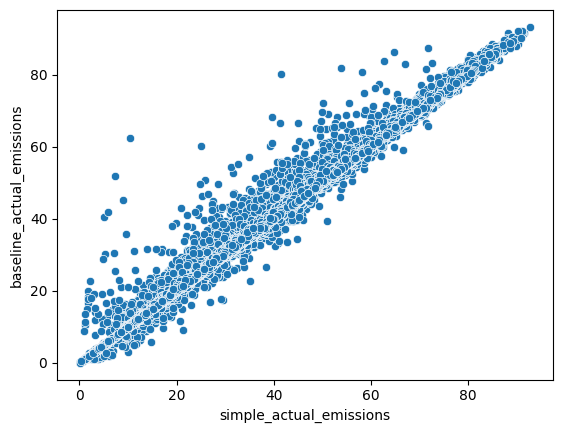

In [22]:
sns.scatterplot(data=results_data, x="simple_actual_emissions", y="baseline_actual_emissions")

<Axes: xlabel='difference', ylabel='total_intervals_plugged_in'>

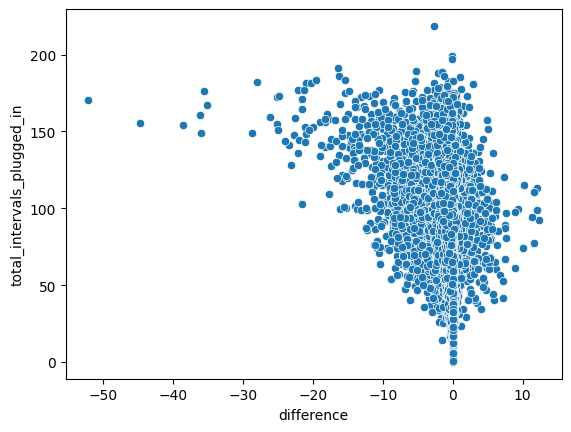

In [23]:
sns.scatterplot(data=results_data, x="difference", y="total_intervals_plugged_in")

<Axes: xlabel='percent_difference_baseline', ylabel='total_intervals_plugged_in'>

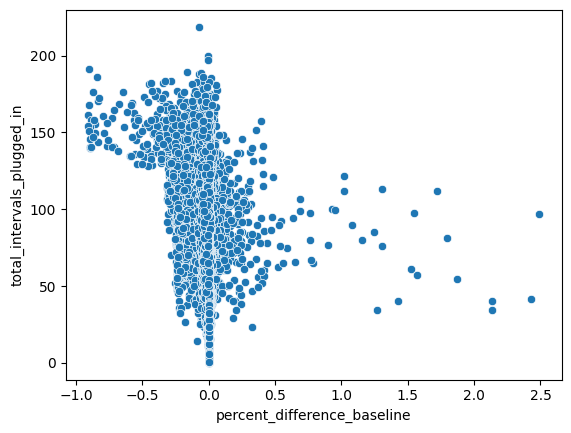

In [28]:
sns.scatterplot(data=results_data, x="percent_difference_baseline", y="total_intervals_plugged_in")

<Axes: xlabel='distinct_dates', ylabel='difference'>

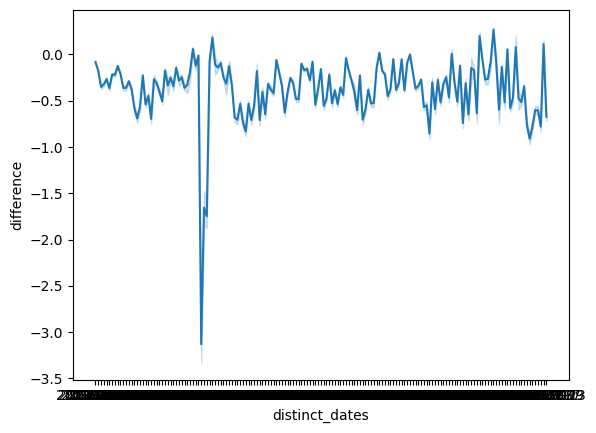

In [24]:
sns.lineplot(data=results_data, x="distinct_dates", y="difference")

<Axes: xlabel='distinct_dates', ylabel='percent_difference_baseline'>

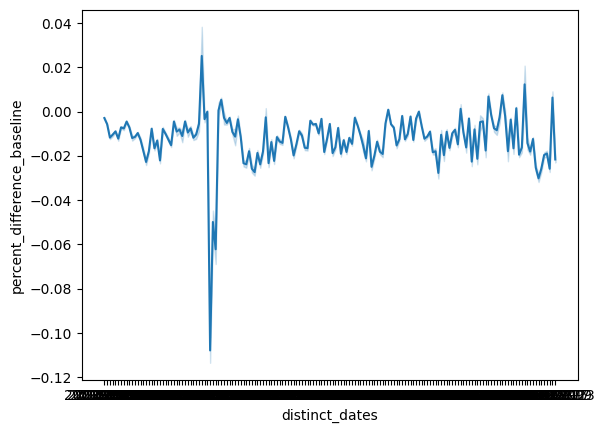

In [29]:
sns.lineplot(data=results_data, x="distinct_dates", y="percent_difference_baseline")

In [30]:
results_data["difference"].sum()

-61640.55609838055

In [35]:
results_data["simple_actual_emissions_per_kwh"] = np.divide(results_data["simple_actual_emissions"],results_data["power_output_rate"])
results_data["baseline_actual_emissions_per_kwh"] = np.divide(results_data["baseline_actual_emissions"],results_data["power_output_rate"])

In [37]:
results_data.corr(numeric_only=True)

,power_output_rate,total_intervals_plugged_in,charged_kWh_actual,MWh_fraction,simple_actual_emissions,baseline_actual_emissions,difference,percent_difference_baseline,simple_actual_emissions_per_kwh,baseline_actual_emissions_per_kwh
power_output_rate,1.000000,-0.007185,0.256942,1.000000,0.253265,0.267504,-0.269251,-0.159711,-0.572259,-0.570796
total_intervals_plugged_in,-0.007185,1.000000,0.259438,-0.007185,0.242936,0.255729,-0.243453,-0.187819,0.286989,0.299015
charged_kWh_actual,0.256942,0.259438,1.000000,0.256942,0.992600,0.993314,-0.111755,0.078521,0.540084,0.543582
MWh_fraction,1.000000,-0.007185,0.256942,1.000000,0.253265,0.267504,-0.269251,-0.159711,-0.572259,-0.570796
simple_actual_emissions,0.253265,0.242936,0.992600,0.253265,1.000000,0.998302,-0.071189,0.102854,0.547993,0.550031
baseline_actual_emissions,0.267504,0.255729,0.993314,0.267504,0.998302,1.000000,-0.129162,0.058736,0.534281,0.538261
difference,-0.269251,-0.243453,-0.111755,-0.269251,-0.071189,-0.129162,1.000000,0.745255,0.179880,0.146419
percent_difference_baseline,-0.159711,-0.187819,0.078521,-0.159711,0.102854,0.058736,0.745255,1.000000,0.219136,0.192570
simple_actual_emissions_per_kwh,-0.572259,0.286989,0.540084,-0.572259,0.547993,0.534281,0.179880,0.219136,1.000000,0.999285
baseline_actual_emissions_per_kwh,-0.570796,0.299015,0.543582,-0.570796,0.550031,0.538261,0.146419,0.192570,0.999285,1.000000


<Axes: xlabel='difference_per_kwh', ylabel='total_intervals_plugged_in'>

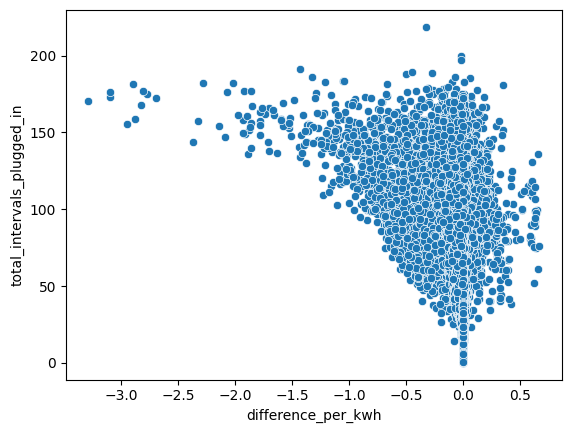

In [43]:
sns.scatterplot(data=results_data, x="difference_per_kwh", y="total_intervals_plugged_in")

In [42]:
results_data["difference_per_kwh"] = np.divide(results_data["difference"],results_data["power_output_rate"])

<Axes: xlabel='distinct_dates', ylabel='difference_per_kwh'>

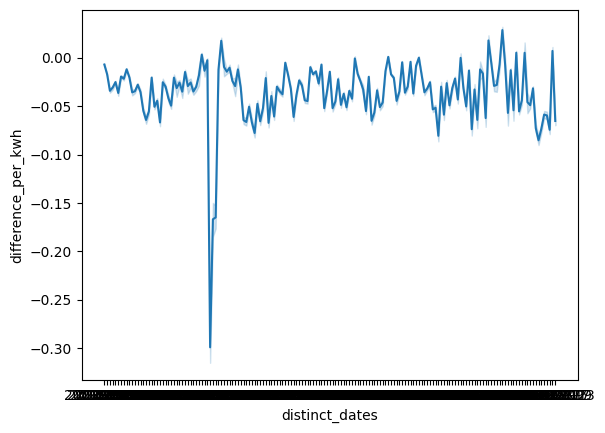

In [44]:
sns.lineplot(data=results_data, x="distinct_dates", y="difference_per_kwh")

<Axes: xlabel='percent_difference_baseline', ylabel='Count'>

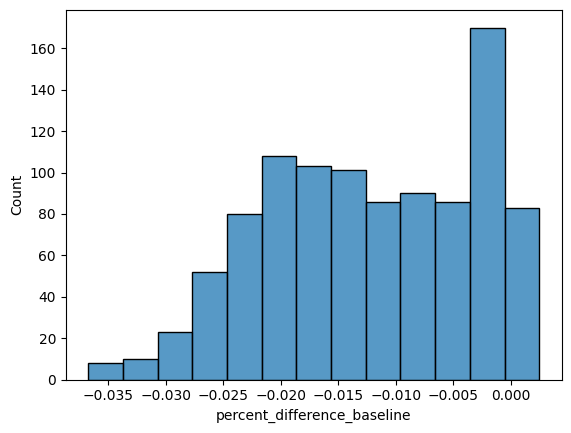

In [51]:
sns.histplot(results_data.groupby('user_type')["percent_difference_baseline"].mean())

<Axes: xlabel='difference', ylabel='Count'>

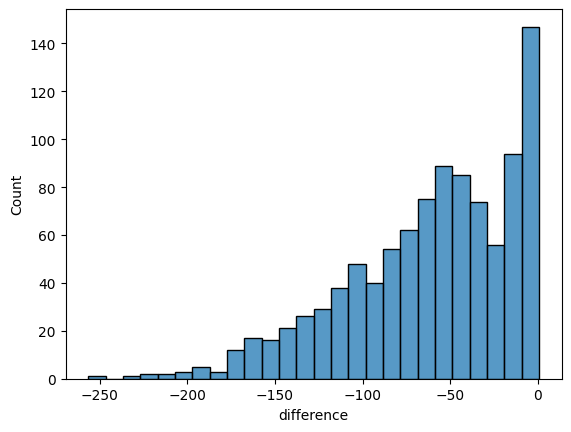

In [54]:
sns.histplot(results_data.groupby('user_type')["difference"].sum(), binwidth=10)

In [55]:
results_data["below_baseline"] = results_data["difference"] < 0

In [57]:
results_data["below_baseline"].value_counts(normalize=True)

below_baseline
True     0.594982
False    0.405018
Name: proportion, dtype: float64